# Deep Learning 실기 평가 - 김민지

- 2020.07.30
- github 주소: https://github.com/mjkim9001

## 1. Iris 데이터에 대해서 5겹 교차검증(K-fold cross bolidation)을 사용하여 분류하시오.

In [5]:
import pandas as pd
df = pd.read_csv('dataset/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [7]:
# seed값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
# 데이터 입력
dataset = df.values
X = np.array(dataset[:,0:4], dtype=np.float64)
Y_obj = dataset[:,4]

In [16]:
# 문자열 변환
e = LabelEncoder().fit(Y_obj)
Y = np.array(e.transform(Y_obj), dtype=np.float64)

In [17]:
# 5개로 쪼갬
n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [25]:
accuracy=[]
for train, test in skf.split(X,Y):
    model = Sequential([
        Dense(24, input_dim=4, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
             optimizer='adam', metrics = ['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5, verbose=0)
    print(len(X[train]), len(X[train]), end=' ')
    k_accuracy = "%.4f" %(model.evaluate(X[test], Y[test], verbose=0)[1])
    print(k_accuracy)
    accuracy.append(k_accuracy)

120 120 0.3333
120 120 0.3667
120 120 0.3333
120 120 0.3667
120 120 0.4667


In [26]:
acc = np.array(accuracy, dtype=np.float64)
np.mean(acc)

0.37333999999999995

In [62]:
## 분류 검증

In [59]:
test_data = np.array([6.7, 3.0, 5.2, 2.3]).reshape(1, 4)

In [60]:
test = model.predict(test_data)[0][0]
test = np.int_([test])[0]
test

1

In [61]:
sp_names = ['Setosa', 'Versicolor', 'Virginica']
print(sp_names[test])

Versicolor


## 2. Fashion MNIST Dataset을 CNN으로 분류하시오.

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [66]:
class_names = ['T-shirt/top','Tourser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [67]:
unique, counts = np.unique(train_labels, return_counts =True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [70]:
x_train = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [71]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [72]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [73]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation = 'relu'),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [75]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [79]:
checkpointer = ModelCheckpoint(filepath = 'model/fashion-cnn-{epoch:02d}-{val_loss:.4f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callbak = EarlyStopping(monitor='val_loss', patience=10)

In [80]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30,
                 batch_size = 200, callbacks = [early_stopping_callbak, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.6181 - accuracy: 0.7792
Epoch 00001: val_loss improved from inf to 0.37835, saving model to model/fashion-cnn-01-0.3784.hdf5
60000/60000 [==============================] - 45s 747us/sample - loss: 0.6175 - accuracy: 0.7794 - val_loss: 0.3784 - val_accuracy: 0.8618
Epoch 2/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.3851 - accuracy: 0.8617
Epoch 00002: val_loss improved from 0.37835 to 0.32140, saving model to model/fashion-cnn-02-0.3214.hdf5
60000/60000 [==============================] - 44s 728us/sample - loss: 0.3848 - accuracy: 0.8617 - val_loss: 0.3214 - val_accuracy: 0.8850
Epoch 3/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.3318 - accuracy: 0.8821
Epoch 00003: val_loss improved from 0.32140 to 0.28289, saving model to model/fashion-cnn-03-0.2829.hdf5
60000/60000 [==============================] - 44s 736us/sa

In [82]:
from tensorflow.keras.models import load_model
del model

In [83]:
model = load_model('model/fashion-cnn-15-0.2173.hdf5')

In [84]:
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9275


In [85]:
# 예측하기
pre = model.predict(x_test)
pre[0]

array([4.2749552e-13, 9.9097131e-10, 6.8586394e-11, 6.6330184e-11,
       9.6559514e-12, 3.9045193e-07, 2.1433740e-11, 4.3007345e-05,
       2.3237809e-11, 9.9995661e-01], dtype=float32)

In [86]:
np.argmax(pre[0])

9

In [87]:
test_labels[0]

9

## 3. IMDB 영화 리뷰 데이터에 대하여 딥 러닝을 이용하여 감성분석을 하시오
## (IabeledTrainDate.tsv 파일 사용)

In [94]:
df = pd.read_csv('dataset/labeledTrainData.tsv', sep='\t')

In [99]:
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [272]:
data = df['review']
label = df['sentiment']


In [273]:
data[0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [274]:
from nltk import word_tokenize
words=[]
for i in range(len(data)):
    a = word_tokenize(data[i])
    words.append(a)

In [275]:
from keras.preprocessing.text import Tokenizer

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(words)
words = tokenizer.texts_to_sequences(words)

In [276]:
words[0]

[23,
 42,
 16,
 542,
 185,
 207,
 41,
 1,
 557,
 23,
 9062,
 15,
 154,
 636,
 2573,
 7,
 35,
 238,
 2,
 164,
 1,
 1041,
 690,
 143,
 4,
 50,
 2,
 301,
 1,
 4,
 301,
 190,
 3,
 284,
 15,
 53,
 196,
 7,
 95,
 5,
 777,
 2515,
 99,
 16,
 243,
 46,
 15,
 214,
 20,
 76,
 678,
 14,
 1,
 4386,
 53,
 7,
 284,
 111,
 71,
 69,
 358,
 710,
 34,
 8,
 2530,
 52,
 1327,
 3,
 8,
 188,
 5042,
 2,
 188,
 822,
 26,
 73,
 15,
 378,
 185,
 7,
 81,
 41,
 1,
 452,
 63,
 13,
 20,
 1755,
 634,
 3,
 61,
 6,
 13,
 56,
 1267,
 3359,
 55,
 9062,
 19,
 543,
 911,
 1,
 3516,
 4,
 97,
 1,
 575,
 755,
 6,
 1653,
 33,
 103,
 11,
 12,
 9,
 10,
 11,
 12,
 9,
 10,
 1934,
 1142,
 24,
 6,
 272,
 16,
 8,
 42,
 55,
 477,
 1564,
 48,
 869,
 29,
 2484,
 49,
 9062,
 14,
 566,
 109,
 29,
 33,
 185,
 7,
 798,
 16,
 4,
 177,
 13,
 371,
 3,
 61,
 210,
 672,
 9062,
 45,
 22,
 7,
 1,
 262,
 6,
 16,
 25,
 24,
 9062,
 4,
 106,
 6,
 35,
 454,
 67,
 149,
 17,
 34,
 110,
 13,
 22,
 1,
 454,
 73,
 57,
 302,
 8,
 76,
 334,
 6,
 2328,
 11,
 1

In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(words, label, test_size=0.2, 
                     shuffle=True, stratify=label, random_state=seed)

In [299]:
max_len=10000
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [306]:
# 딥러닝 모델 설정
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model_deep = Sequential([
    Dense(36, input_shape=(10000,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [307]:
# 모델 컴파일
model_deep.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [308]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model/sent_deep.hdf5',
                            monitor ='val_loss',
                            verbose = 1, save_best_only=True)

In [309]:
# 모델 생성
history=model_deep.fit(x_train, y_train, epochs=100,batch_size=30, verbose=2,
         validation_split=0.2, callbacks=[checkpointer])

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
 - 3s - loss: 2.5327 - accuracy: 0.4951 - val_loss: 0.8176 - val_accuracy: 0.4990

Epoch 00001: val_loss improved from inf to 0.81761, saving model to model/sent_deep.hdf5
Epoch 2/100
 - 3s - loss: 0.8116 - accuracy: 0.5107 - val_loss: 0.8034 - val_accuracy: 0.5067

Epoch 00002: val_loss improved from 0.81761 to 0.80343, saving model to model/sent_deep.hdf5
Epoch 3/100
 - 3s - loss: 0.7560 - accuracy: 0.5216 - val_loss: 0.7499 - val_accuracy: 0.4893

Epoch 00003: val_loss improved from 0.80343 to 0.74992, saving model to model/sent_deep.hdf5
Epoch 4/100
 - 3s - loss: 0.7783 - accuracy: 0.5237 - val_loss: 0.7967 - val_accuracy: 0.5088

Epoch 00004: val_loss did not improve from 0.74992
Epoch 5/100
 - 3s - loss: 0.7671 - accuracy: 0.5210 - val_loss: 0.7327 - val_accuracy: 0.5088

Epoch 00005: val_loss improved from 0.74992 to 0.73274, saving model to model/sent_deep.hdf5
Epoch 6/100
 - 3s - loss: 0.7567 - accuracy: 0.5255 - val

 - 3s - loss: 0.5834 - accuracy: 0.6083 - val_loss: 1.0394 - val_accuracy: 0.5013

Epoch 00054: val_loss did not improve from 0.70370
Epoch 55/100
 - 3s - loss: 0.5789 - accuracy: 0.6102 - val_loss: 1.1668 - val_accuracy: 0.5020

Epoch 00055: val_loss did not improve from 0.70370
Epoch 56/100
 - 3s - loss: 0.5779 - accuracy: 0.6112 - val_loss: 1.0939 - val_accuracy: 0.4988

Epoch 00056: val_loss did not improve from 0.70370
Epoch 57/100
 - 3s - loss: 0.5788 - accuracy: 0.6126 - val_loss: 1.1290 - val_accuracy: 0.4970

Epoch 00057: val_loss did not improve from 0.70370
Epoch 58/100
 - 3s - loss: 0.5778 - accuracy: 0.6152 - val_loss: 1.1998 - val_accuracy: 0.4980

Epoch 00058: val_loss did not improve from 0.70370
Epoch 59/100
 - 3s - loss: 0.5734 - accuracy: 0.6174 - val_loss: 1.2141 - val_accuracy: 0.5017

Epoch 00059: val_loss did not improve from 0.70370
Epoch 60/100
 - 3s - loss: 0.5707 - accuracy: 0.6199 - val_loss: 1.0658 - val_accuracy: 0.4997

Epoch 00060: val_loss did not impro

In [310]:
from keras.models import load_model
model_deep = load_model('model/sent_deep.hdf5')

In [311]:
model_deep.evaluate(x_test, y_test)[1]

5000/5000 [==============================] - 0s 48us/step


0.4968000054359436

In [312]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

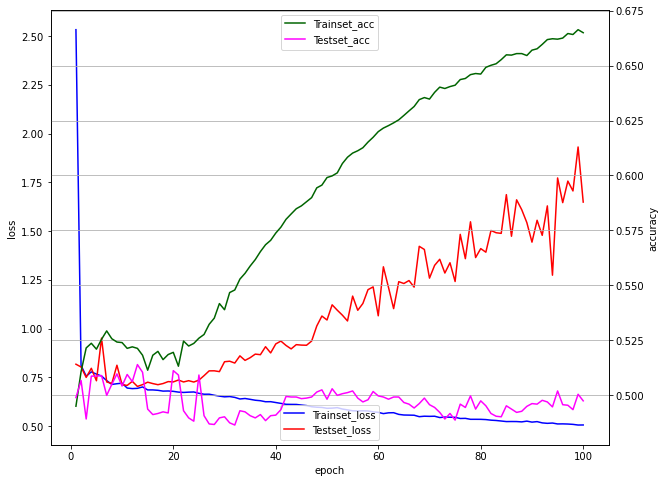

In [313]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center')
ax1.legend(loc='upper center')
plt.grid()
plt.show()